In [1]:
import numpy as np
import matplotlib.pyplot as plt 
N = 100
pi = np.pi 
flies_ini_phase = np.random.uniform(-pi,pi,N) 
curr_phase = flies_ini_phase 
w = 50
dt = 0.01
step_size = 200 
phases_minus_mean = [] 
maxIter = 100 
std = 0 
Krc_arr = [k for k in range(10,70,5)] 
num_Iter_arr = [] 

In [2]:
def calculate_phases(Kr, w, curr_phase ,step_size, dt): 
    j = 0
    for t in range (0,step_size):    
        phase_mean = np.mean(curr_phase)  
        for i in range (0,len(curr_phase)): 
            curr_phase[i] += w + dt * Kr * np.sin(phase_mean-curr_phase[i]) 
    phases_minus_mean = curr_phase - np.mean(curr_phase) 
    while j < len(curr_phase): 
        if phases_minus_mean[j] > pi or phases_minus_mean[j] < -pi: 
            curr_phase = np.delete(curr_phase,j,None)
            phases_minus_mean = np.delete(phases_minus_mean,j,None)
        j+=1 
    return curr_phase 

In [3]:
def determine_synchronize(Kr,w,curr_phase ,step_size, dt): 
    synchro = False 
    for a in range(maxIter): 
        curr_phase = calculate_phases(Kr, w, curr_phase ,step_size, dt) 
        std = np.std(curr_phase) 
        if std < 10**-4: 
            synchro = True 
            numIter = a 
            break 
    if synchro == True: 
        print("The fireflies eventually synchronize with Kr value "+str(Kr)+" and natural frequency " +str(w)+".") 
        return synchro, numIter  
    else: 
        print("The fireflies do not synchronize with Kr value "+str(Kr)+" and natural frequency " +str(w)+".") 
        return synchro, -1  

In [4]:
for i in range(len(Krc_arr)): 
    synchro, numIter = determine_synchronize(Krc_arr[i]/100,w,curr_phase,step_size,dt) 
    num_Iter_arr.append(numIter) 

The fireflies eventually synchronize with Kr value 0.1 and natural frequency 50.
The fireflies eventually synchronize with Kr value 0.15 and natural frequency 50.
The fireflies eventually synchronize with Kr value 0.2 and natural frequency 50.
The fireflies eventually synchronize with Kr value 0.25 and natural frequency 50.
The fireflies eventually synchronize with Kr value 0.3 and natural frequency 50.
The fireflies eventually synchronize with Kr value 0.35 and natural frequency 50.
The fireflies eventually synchronize with Kr value 0.4 and natural frequency 50.
The fireflies eventually synchronize with Kr value 0.45 and natural frequency 50.
The fireflies eventually synchronize with Kr value 0.5 and natural frequency 50.
The fireflies eventually synchronize with Kr value 0.55 and natural frequency 50.
The fireflies eventually synchronize with Kr value 0.6 and natural frequency 50.
The fireflies eventually synchronize with Kr value 0.65 and natural frequency 50.


In [5]:
print(num_Iter_arr)

[58, 37, 31, 22, 17, 13, 11, 8, 7, 5, 4, 2]


Text(0.5, 1.0, 'Number of Iterations Required vs. Kr Value')

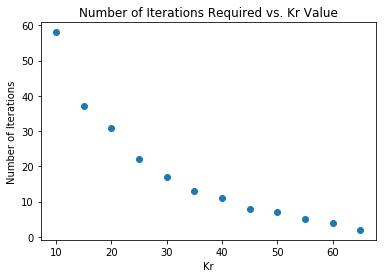

In [7]:
plt.scatter(Krc_arr, num_Iter_arr) 
plt.xlabel('Kr')
plt.ylabel('Number of Iterations') 
plt.title('Number of Iterations Required vs. Kr Value') 